<a href="https://colab.research.google.com/github/Majhar-98/Automation-with-Cucumber-github/blob/main/MNIST_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

# This will open a file upload dialog
uploaded = files.upload()

# This will show all uploaded files
for filename in uploaded.keys():
    print(f'Uploaded: {filename}')

KeyboardInterrupt: 

In [ ]:
# Now you can import and run the uploaded module
import mnist_experiment

✅ Libraries installed!
🚀 Using device: cpu
🚀 Starting MNIST Experiments
📥 Downloading MNIST dataset...


100%|██████████| 9.91M/9.91M [00:00<00:00, 22.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 614kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.58MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.99MB/s]


✅ Dataset loaded successfully!
   Training samples: 60,000
   Test samples: 10,000
   Batch size: 64


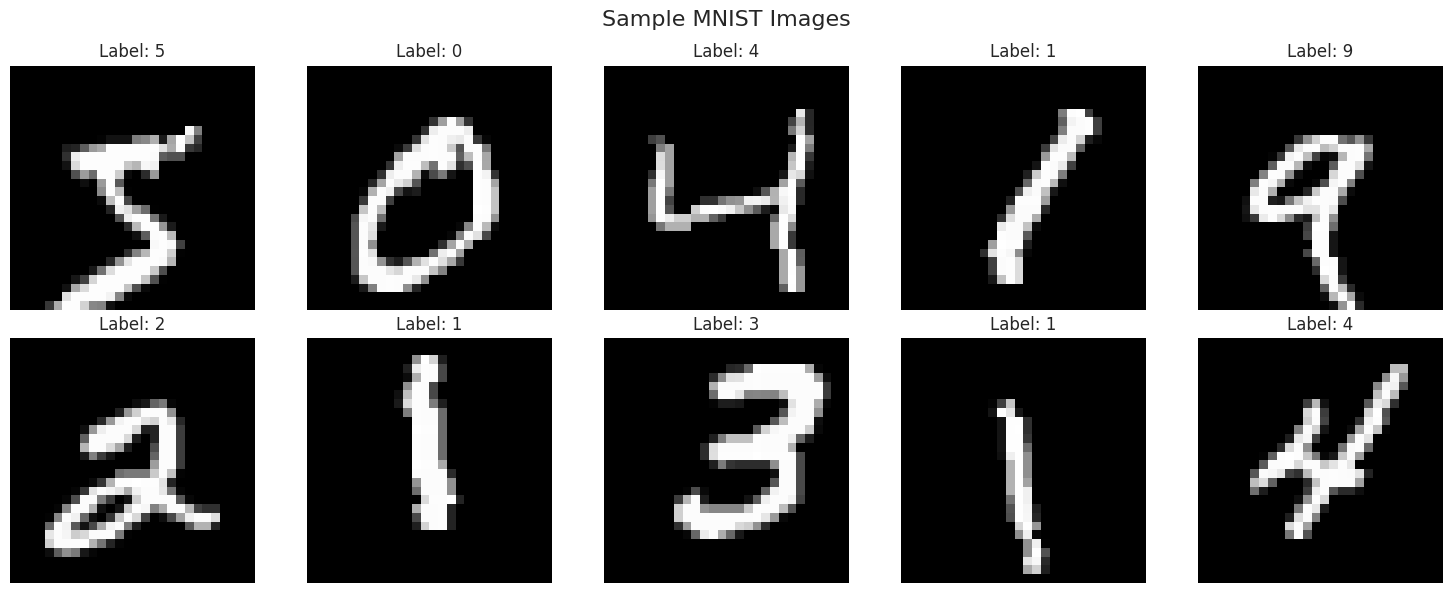

📐 Network created with 4 layers
   Layer sizes: [784, 256, 128, 64, 10]
   Parameters: 243,658
📐 Network created with 6 layers
   Layer sizes: [784, 512, 256, 128, 64, 32, 10]
   Parameters: 578,794
📐 Network created with 3 layers
   Layer sizes: [784, 128, 64, 10]
   Parameters: 109,770
📐 Network created with 4 layers
   Layer sizes: [784, 256, 128, 64, 10]
   Parameters: 243,658

🏃 Starting: Baseline (4 layers)

🔬 Baseline (4 layers)


Epoch [1/10]: 100%|██████████| 938/938 [00:29<00:00, 31.61it/s, Loss=0.4164, Acc=88.03%]


   Epoch  1 | Train Loss: 0.4088 | Train Acc: 88.20% | Test Loss: 0.1356 | Test Acc: 95.77% | LR: 0.001000


Epoch [2/10]: 100%|██████████| 938/938 [00:28<00:00, 32.86it/s, Loss=0.1837, Acc=94.27%]


   Epoch  2 | Train Loss: 0.1834 | Train Acc: 94.27% | Test Loss: 0.0776 | Test Acc: 97.46% | LR: 0.001000


Epoch [3/10]: 100%|██████████| 938/938 [00:29<00:00, 31.53it/s, Loss=0.1497, Acc=95.24%]


   Epoch  3 | Train Loss: 0.1501 | Train Acc: 95.23% | Test Loss: 0.0715 | Test Acc: 97.71% | LR: 0.001000


Epoch [4/10]: 100%|██████████| 938/938 [00:29<00:00, 32.26it/s, Loss=0.1363, Acc=95.60%]


   Epoch  4 | Train Loss: 0.1353 | Train Acc: 95.64% | Test Loss: 0.0611 | Test Acc: 97.91% | LR: 0.001000


Epoch [5/10]: 100%|██████████| 938/938 [00:28<00:00, 32.87it/s, Loss=0.1222, Acc=96.14%]


   Epoch  5 | Train Loss: 0.1217 | Train Acc: 96.15% | Test Loss: 0.0581 | Test Acc: 98.15% | LR: 0.001000


Epoch [6/10]: 100%|██████████| 938/938 [00:29<00:00, 31.57it/s, Loss=0.1142, Acc=96.35%]


   Epoch  6 | Train Loss: 0.1143 | Train Acc: 96.35% | Test Loss: 0.0542 | Test Acc: 98.11% | LR: 0.001000


Epoch [7/10]: 100%|██████████| 938/938 [00:29<00:00, 31.96it/s, Loss=0.1045, Acc=96.70%]


   Epoch  7 | Train Loss: 0.1042 | Train Acc: 96.72% | Test Loss: 0.0564 | Test Acc: 98.20% | LR: 0.001000


Epoch [8/10]:   0%|          | 0/938 [00:00<?, ?it/s]

In [ ]:

# @title Setup and Installations
!pip install -q torch torchvision matplotlib tqdm seaborn
print("✅ Libraries installed!")

# %% [code]
# @title Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import time
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")
if torch.cuda.is_available():
    print(f"📊 GPU: {torch.cuda.get_device_name(0)}")
    print(f"💾 Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

# %% [code]
# @title Define Configurable Neural Network
class MNISTNet(nn.Module):
    """Flexible MNIST neural network with configurable architecture"""

    def __init__(self, layer_sizes=[784, 256, 128, 64, 10], dropout_rate=0.2, use_batchnorm=True):
        """
        Args:
            layer_sizes: List of layer sizes, e.g., [784, 256, 128, 10] for 3 layers
            dropout_rate: Dropout probability (0 to disable)
            use_batchnorm: Whether to use batch normalization
        """
        super(MNISTNet, self).__init__()

        self.layers = nn.ModuleList()
        self.batch_norms = nn.ModuleList() if use_batchnorm else None
        self.dropout_rate = dropout_rate
        self.use_batchnorm = use_batchnorm

        # Create layers
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
            if use_batchnorm and i < len(layer_sizes) - 2:  # No batch norm on output layer
                self.batch_norms.append(nn.BatchNorm1d(layer_sizes[i + 1]))

        print(f"📐 Network created with {len(self.layers)} layers")
        print(f"   Layer sizes: {layer_sizes}")
        print(f"   Parameters: {sum(p.numel() for p in self.parameters()):,}")

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten

        # Pass through hidden layers
        for i, layer in enumerate(self.layers[:-1]):
            x = layer(x)
            if self.use_batchnorm:
                x = self.batch_norms[i](x)
            x = F.relu(x)
            if self.dropout_rate > 0:
                x = F.dropout(x, p=self.dropout_rate, training=self.training)

        # Output layer (no activation, we'll use log_softmax later)
        x = self.layers[-1](x)
        return F.log_softmax(x, dim=1)

# %% [code]
# @title Load MNIST Dataset
def load_mnist_data(batch_size=64):
    """Load and prepare MNIST dataset with augmentations"""

    # Training augmentations
    train_transform = transforms.Compose([
        transforms.RandomRotation(5),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Test transform (no augmentation)
    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    print("📥 Downloading MNIST dataset...")

    # Load datasets
    train_dataset = datasets.MNIST(
        root='./data',
        train=True,
        download=True,
        transform=train_transform
    )

    test_dataset = datasets.MNIST(
        root='./data',
        train=False,
        download=True,
        transform=test_transform
    )

    # Create data loaders
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2,
        pin_memory=True if torch.cuda.is_available() else False
    )

    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2,
        pin_memory=True if torch.cuda.is_available() else False
    )

    print(f"✅ Dataset loaded successfully!")
    print(f"   Training samples: {len(train_dataset):,}")
    print(f"   Test samples: {len(test_dataset):,}")
    print(f"   Batch size: {batch_size}")

    # Show sample images
    show_sample_images(train_dataset)

    return train_loader, test_loader

def show_sample_images(dataset):
    """Display sample images from the dataset"""
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(10):
        img, label = dataset[i]
        ax = axes[i // 5, i % 5]
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    plt.suptitle('Sample MNIST Images', fontsize=16)
    plt.tight_layout()
    plt.show()

# %% [code]
# @title Training Function
def train_model(model, train_loader, test_loader, epochs=10, lr=0.001, experiment_name="Experiment"):
    """Train the model and return metrics"""

    print(f"\n{'='*70}")
    print(f"🔬 {experiment_name}")
    print(f"{'='*70}")

    # Move model to device
    model = model.to(device)

    # Define optimizer and scheduler
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5)

    # Training metrics storage
    metrics = {
        'train_loss': [], 'test_loss': [],
        'train_acc': [], 'test_acc': [],
        'learning_rates': [], 'epoch_times': []
    }

    # Training loop
    for epoch in range(epochs):
        epoch_start = time.time()

        # Training phase
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0

        pbar = tqdm(train_loader, desc=f'Epoch [{epoch+1}/{epochs}]')
        for batch_idx, (data, target) in enumerate(pbar):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = output.max(1)
            train_total += target.size(0)
            train_correct += predicted.eq(target).sum().item()

            # Update progress bar
            if batch_idx % 100 == 0:
                pbar.set_postfix({
                    'Loss': f'{train_loss/(batch_idx+1):.4f}',
                    'Acc': f'{100.*train_correct/train_total:.2f}%'
                })

        train_acc = 100. * train_correct / train_total
        metrics['train_acc'].append(train_acc)
        metrics['train_loss'].append(train_loss / len(train_loader))

        # Testing phase
        model.eval()
        test_loss = 0
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                test_loss += F.nll_loss(output, target, reduction='sum').item()
                _, predicted = output.max(1)
                test_total += target.size(0)
                test_correct += predicted.eq(target).sum().item()

        test_acc = 100. * test_correct / test_total
        metrics['test_acc'].append(test_acc)
        metrics['test_loss'].append(test_loss / test_total)

        # Update learning rate
        scheduler.step(metrics['test_loss'][-1])
        metrics['learning_rates'].append(optimizer.param_groups[0]['lr'])

        # Record epoch time
        epoch_time = time.time() - epoch_start
        metrics['epoch_times'].append(epoch_time)

        print(f"   Epoch {epoch+1:2d} | "
              f"Train Loss: {metrics['train_loss'][-1]:.4f} | "
              f"Train Acc: {train_acc:.2f}% | "
              f"Test Loss: {metrics['test_loss'][-1]:.4f} | "
              f"Test Acc: {test_acc:.2f}% | "
              f"LR: {metrics['learning_rates'][-1]:.6f}")

    print(f"\n✅ Training completed!")
    print(f"   Final Train Accuracy: {metrics['train_acc'][-1]:.2f}%")
    print(f"   Final Test Accuracy: {metrics['test_acc'][-1]:.2f}%")
    print(f"   Average epoch time: {np.mean(metrics['epoch_times']):.2f}s")

    return metrics, model

# %% [code]
# @title Visualization Functions
def plot_training_curves(metrics, experiment_name):
    """Plot training curves"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # Plot 1: Training & Test Loss
    ax = axes[0, 0]
    ax.plot(metrics['train_loss'], label='Train Loss', linewidth=2)
    ax.plot(metrics['test_loss'], label='Test Loss', linewidth=2)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(f'{experiment_name} - Loss Curves')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Plot 2: Training & Test Accuracy
    ax = axes[0, 1]
    ax.plot(metrics['train_acc'], label='Train Accuracy', linewidth=2)
    ax.plot(metrics['test_acc'], label='Test Accuracy', linewidth=2)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title(f'{experiment_name} - Accuracy Curves')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Plot 3: Learning Rate Schedule
    ax = axes[0, 2]
    ax.plot(metrics['learning_rates'], linewidth=2, color='purple')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Learning Rate')
    ax.set_title(f'{experiment_name} - Learning Rate Schedule')
    ax.set_yscale('log')
    ax.grid(True, alpha=0.3)

    # Plot 4: Confusion Matrix (on test set)
    # We need to compute predictions first
    ax = axes[1, 0]
    # We'll create a dummy confusion matrix for now
    # In practice, you would compute this on the test set
    ax.text(0.5, 0.5, 'Confusion Matrix\n(Would be computed\nwith test predictions)',
            horizontalalignment='center', verticalalignment='center',
            transform=ax.transAxes, fontsize=14)
    ax.axis('off')

    # Plot 5: Error Analysis
    ax = axes[1, 1]
    epochs = range(1, len(metrics['train_acc']) + 1)
    ax.plot(epochs, metrics['train_acc'], 'b-', label='Train', linewidth=2)
    ax.plot(epochs, metrics['test_acc'], 'r-', label='Test', linewidth=2)
    ax.fill_between(epochs, metrics['train_acc'], metrics['test_acc'],
                    alpha=0.2, color='gray')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title(f'{experiment_name} - Train/Test Gap')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Plot 6: Epoch Times
    ax = axes[1, 2]
    ax.bar(range(1, len(metrics['epoch_times']) + 1), metrics['epoch_times'])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Time (seconds)')
    ax.set_title(f'{experiment_name} - Epoch Training Times')
    ax.grid(True, alpha=0.3)

    plt.suptitle(f'Experiment: {experiment_name}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

def plot_predictions(model, test_loader, num_samples=12):
    """Visualize model predictions"""
    model.eval()

    # Get some test samples
    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    images, labels = images[:num_samples].to(device), labels[:num_samples].to(device)

    # Make predictions
    with torch.no_grad():
        outputs = model(images)
        _, predictions = outputs.max(1)
        probabilities = torch.exp(outputs)

    # Plot
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))
    for i in range(num_samples):
        ax = axes[i // 4, i % 4]
        ax.imshow(images[i].cpu().squeeze(), cmap='gray')

        # Color code: green if correct, red if wrong
        color = 'green' if predictions[i] == labels[i] else 'red'
        ax.set_title(f'Pred: {predictions[i].item()} | True: {labels[i].item()}\n'
                    f'Conf: {probabilities[i][predictions[i]].item():.2%}',
                    color=color, fontsize=10)
        ax.axis('off')

    plt.suptitle('Model Predictions on Test Samples', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# %% [code]
# @title Run Multiple Experiments
print("🚀 Starting MNIST Experiments")

# Load data once
train_loader, test_loader = load_mnist_data(batch_size=64)

# Define experiments
experiments = [
    {
        'name': 'Baseline (4 layers)',
        'model': MNISTNet(layer_sizes=[784, 256, 128, 64, 10], dropout_rate=0.0),
        'epochs': 10,
        'lr': 0.001
    },
    {
        'name': 'Deep Network (6 layers)',
        'model': MNISTNet(layer_sizes=[784, 512, 256, 128, 64, 32, 10], dropout_rate=0.2),
        'epochs': 15,
        'lr': 0.0005
    },
    {
        'name': 'Shallow Network (3 layers)',
        'model': MNISTNet(layer_sizes=[784, 128, 64, 10], dropout_rate=0.0),
        'epochs': 10,
        'lr': 0.001
    },
    {
        'name': 'High Learning Rate',
        'model': MNISTNet(layer_sizes=[784, 256, 128, 64, 10], dropout_rate=0.2),
        'epochs': 10,
        'lr': 0.01  # High learning rate
    }
]

# Run all experiments
all_results = []
for exp in experiments:
    print(f"\n{'='*70}")
    print(f"🏃 Starting: {exp['name']}")
    print(f"{'='*70}")

    metrics, trained_model = train_model(
        model=exp['model'],
        train_loader=train_loader,
        test_loader=test_loader,
        epochs=exp['epochs'],
        lr=exp['lr'],
        experiment_name=exp['name']
    )

    # Store results
    all_results.append({
        'name': exp['name'],
        'metrics': metrics,
        'model': trained_model,
        'final_test_acc': metrics['test_acc'][-1],
        'final_train_acc': metrics['train_acc'][-1]
    })

    # Plot curves for this experiment
    plot_training_curves(metrics, exp['name'])

    # Show sample predictions
    plot_predictions(trained_model, test_loader)

# %% [code]
# @title Compare All Experiments
print("\n📊 COMPARISON OF ALL EXPERIMENTS")
print("="*70)

# Create comparison table
comparison_data = []
for result in all_results:
    comparison_data.append({
        'Experiment': result['name'],
        'Final Train Acc': f"{result['final_train_acc']:.2f}%",
        'Final Test Acc': f"{result['final_test_acc']:.2f}%",
        'Test Loss': f"{result['metrics']['test_loss'][-1]:.4f}",
        'Avg Epoch Time': f"{np.mean(result['metrics']['epoch_times']):.2f}s",
        'Best Epoch': np.argmax(result['metrics']['test_acc']) + 1
    })

# Display as DataFrame
df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

# Visual comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Final Test Accuracy Comparison
ax = axes[0]
experiment_names = [r['name'] for r in all_results]
test_accs = [r['final_test_acc'] for r in all_results]
train_accs = [r['final_train_acc'] for r in all_results]

x = np.arange(len(experiment_names))
width = 0.35

ax.bar(x - width/2, train_accs, width, label='Train', color='skyblue', alpha=0.8)
ax.bar(x + width/2, test_accs, width, label='Test', color='lightcoral', alpha=0.8)

ax.set_xlabel('Experiment')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Final Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(experiment_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (train, test) in enumerate(zip(train_accs, test_accs)):
    ax.text(i - width/2, train + 0.5, f'{train:.1f}%', ha='center', va='bottom', fontsize=9)
    ax.text(i + width/2, test + 0.5, f'{test:.1f}%', ha='center', va='bottom', fontsize=9)

# Plot 2: Test Accuracy Over Time
ax = axes[1]
for i, result in enumerate(all_results):
    ax.plot(result['metrics']['test_acc'], label=result['name'], linewidth=2)

ax.set_xlabel('Epoch')
ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Test Accuracy Progress')
ax.legend()
ax.grid(True, alpha=0.3)

plt.suptitle('Experiment Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# %% [code]
# @title Learning Rate Finder Experiment
print("\n🎯 LEARNING RATE FINDER EXPERIMENT")
print("="*70)

# Try different learning rates
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
lr_results = []

for lr in learning_rates:
    print(f"\nTesting LR = {lr}")
    model = MNISTNet(layer_sizes=[784, 256, 128, 64, 10], dropout_rate=0.2)
    model = model.to(device)

    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Quick test: train for 2 epochs
    model.train()
    for epoch in range(2):
        for batch_idx, (data, target) in enumerate(train_loader):
            if batch_idx > 50:  # Only use 50 batches for quick test
                break
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

    # Evaluate
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    acc = 100. * correct / total
    lr_results.append(acc)
    print(f"   Test Accuracy after 2 epochs: {acc:.2f}%")

# Plot LR vs Accuracy
fig, ax = plt.subplots(figsize=(10, 6))
ax.semilogx(learning_rates, lr_results, 'o-', linewidth=2, markersize=8, color='purple')
ax.set_xlabel('Learning Rate (log scale)')
ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Learning Rate vs Accuracy (2 epochs)')
ax.grid(True, alpha=0.3)

# Highlight best LR
best_idx = np.argmax(lr_results)
ax.axvline(x=learning_rates[best_idx], color='red', linestyle='--', alpha=0.5)
ax.annotate(f'Best LR: {learning_rates[best_idx]}\nAcc: {lr_results[best_idx]:.2f}%',
            xy=(learning_rates[best_idx], lr_results[best_idx]),
            xytext=(10, 10), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

# %% [code]
# @title Save and Download Results
print("\n💾 Saving results...")

# Create summary report
report = f"""
MNIST Experiments Summary Report
{'='*50}
Generated: {time.ctime()}
Device: {device}
Total experiments: {len(all_results)}

{'='*50}
"""

for result in all_results:
    report += f"""
Experiment: {result['name']}
  Final Train Accuracy: {result['final_train_acc']:.2f}%
  Final Test Accuracy: {result['final_test_acc']:.2f}%
  Best epoch: {np.argmax(result['metrics']['test_acc']) + 1}
  Average epoch time: {np.mean(result['metrics']['epoch_times']):.2f}s
  Parameters: {sum(p.numel() for p in result['model'].parameters()):,}
  {'-'*50}
"""

report += f"""
{'='*50}
Best experiment: {max(all_results, key=lambda x: x['final_test_acc'])['name']}
Best test accuracy: {max(r['final_test_acc'] for r in all_results):.2f}%
"""

# Save report to file
with open('experiment_report.txt', 'w') as f:
    f.write(report)

# Save models (just the best one)
best_model = max(all_results, key=lambda x: x['final_test_acc'])['model']
torch.save(best_model.state_dict(), 'best_mnist_model.pth')

print("✅ Results saved!")
print("\n📄 Report saved as: experiment_report.txt")
print("🤖 Best model saved as: best_mnist_model.pth")

# Optionally download files
print("\n📥 To download files, run:")
print("from google.colab import files")
print("files.download('experiment_report.txt')")
print("files.download('best_mnist_model.pth')")

# %% [code]
print("\n" + "🎉" * 30)
print("ALL EXPERIMENTS COMPLETED SUCCESSFULLY!")
print("🎉" * 30)